# Temperature Analysis
---
This notebook deals with the question whether the temperature has an effect on the voltage in our system and what the long term dependencies are during extensive profile runs

In [227]:
# library imports
import numpy as np
import matplotlib.pyplot as plt

## Long Runs 
---
Analyse the effect of temperature in long profile runs with several charge and discharge processes


### Profile: RI Jumps 25A
---

#### Inverter Current

Text(0.5, 0.98, 'Ri Jumps 25A: Inverter Current')

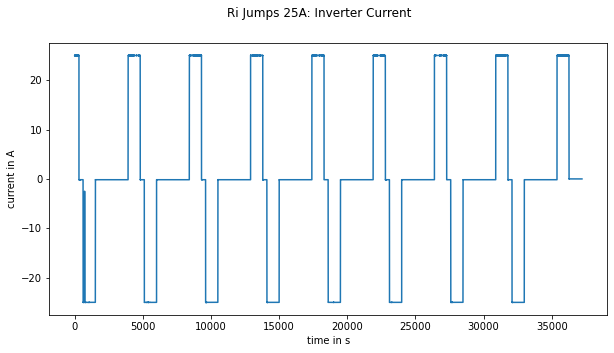

In [250]:
# load inverter data
cur_inv = np.loadtxt('../data/fobss_data/data/Ri Jumps 25A/inverter/Inverter_Current.csv', delimiter=';')
master_volt = np.loadtxt('../data/fobss_data/data/Ri Jumps 25A/battery/Battery_Voltage.csv', delimiter=';')
# delete unnecessary data
cur_inv = cur_inv[0:-450000,:]
master_volt = master_volt[0:-450000,:]
# normalize CAN time
cur_inv = cur_inv - [cur_inv[0,0],0]
master_volt = master_volt - [master_volt[0,0],0]
# plot graph
plt.subplots(figsize = (10,5))
plt.plot(cur_inv[:,0], cur_inv[:,1])
plt.xlabel('time in s')
plt.ylabel('current in A')
plt.suptitle('Ri Jumps 25A: Inverter Current')

#### Slave Temperatures

Text(0.5, 0.98, 'Ri Jumps 25A: Slave Temperature')

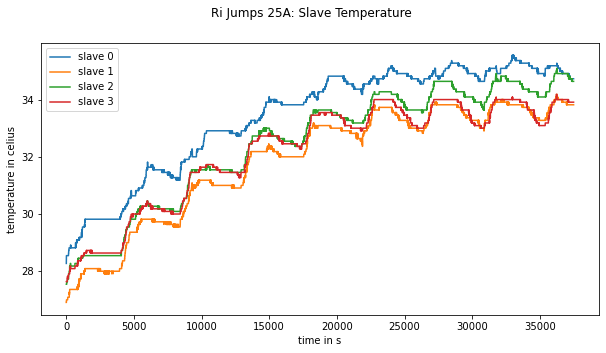

In [229]:
# load cell temperature data
temp_slave_0 = np.loadtxt('../data/fobss_data/data/Ri Jumps 25A/cells/Slave_0_Cell_Temperatures.csv', delimiter=';')
temp_slave_1 = np.loadtxt('../data/fobss_data/data/Ri Jumps 25A/cells/Slave_1_Cell_Temperatures.csv', delimiter=';')
temp_slave_2 = np.loadtxt('../data/fobss_data/data/Ri Jumps 25A/cells/Slave_2_Cell_Temperatures.csv', delimiter=';')
temp_slave_3 = np.loadtxt('../data/fobss_data/data/Ri Jumps 25A/cells/Slave_3_Cell_Temperatures.csv', delimiter=';')
# delete unnecessary data
temp_slave_0 = temp_slave_0[0:25000,:]
temp_slave_1 = temp_slave_1[0:25000,:]
temp_slave_2 = temp_slave_2[0:25000,:]
temp_slave_3 = temp_slave_3[0:25000,:]
# compute average temperatures for each slave
temp_slave_0 = np.column_stack((temp_slave_0[:,0], np.mean(temp_slave_0[:, 1:temp_slave_0.shape[1]], axis=1)))
temp_slave_1 = np.column_stack((temp_slave_1[:,0], np.mean(temp_slave_1[:, 1:temp_slave_1.shape[1]], axis=1)))
temp_slave_2 = np.column_stack((temp_slave_2[:,0], np.mean(temp_slave_2[:, 1:temp_slave_2.shape[1]], axis=1)))
temp_slave_3 = np.column_stack((temp_slave_3[:,0], np.mean(temp_slave_3[:, 1:temp_slave_3.shape[1]], axis=1)))
# normalize CAN time
temp_slave_0 = temp_slave_0 - [temp_slave_0[0,0],0] 
temp_slave_1 = temp_slave_1 - [temp_slave_1[0,0],0]
temp_slave_2 = temp_slave_2 - [temp_slave_2[0,0],0]
temp_slave_3 = temp_slave_3 - [temp_slave_3[0,0],0]
# plot graph
plt.subplots(figsize = (10,5))
plt.plot(temp_slave_0[:,0], temp_slave_0[:,1], label="slave 0")
plt.plot(temp_slave_1[:,0], temp_slave_1[:,1], label="slave 1")
plt.plot(temp_slave_2[:,0], temp_slave_2[:,1], label="slave 2")
plt.plot(temp_slave_3[:,0], temp_slave_3[:,1], label="slave 3")
plt.legend()
plt.xlabel('time in s')
plt.ylabel('temperature in celius')
plt.suptitle('Ri Jumps 25A: Slave Temperature')

#### Overview of Current and Temperature

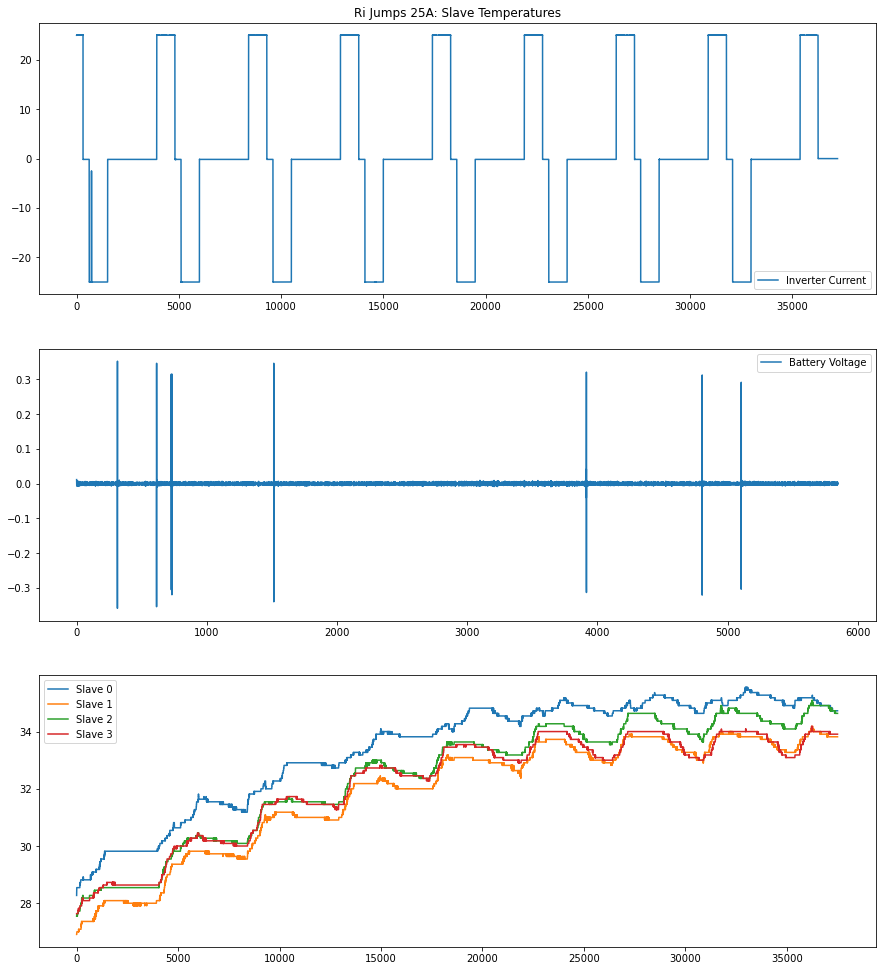

In [252]:
temp_grad_slave_0 = np.column_stack((temp_slave_0[:,0], np.gradient(temp_slave_0[:, 1:temp_slave_0.shape[1]].flatten())))
temp_grad_slave_1 = np.column_stack((temp_slave_1[:,0], np.gradient(temp_slave_1[:, 1:temp_slave_1.shape[1]].flatten())))
temp_grad_slave_2 = np.column_stack((temp_slave_2[:,0], np.gradient(temp_slave_2[:, 1:temp_slave_2.shape[1]].flatten())))
temp_grad_slave_3 = np.column_stack((temp_slave_3[:,0], np.gradient(temp_slave_3[:, 1:temp_slave_3.shape[1]].flatten())))

master_volt = np.column_stack((master_volt[:,0], np.gradient(master_volt[:, 1:master_volt.shape[1]].flatten())))

figure, axes = plt.subplots(figsize = (15,17))
plt.subplot(3,1,1)
plt.title('Ri Jumps 25A: Slave Temperatures')
plt.plot(cur_inv[:,0], cur_inv[:,1], label="Inverter Current")
plt.legend()
plt.subplot(3,1,2)
plt.plot(master_volt[:,0], master_volt[:,1], label="Battery Voltage")
plt.legend()
plt.subplot(3,1,3)
plt.plot(temp_slave_0[:,0], temp_slave_0[:,1], label="Slave 0")
plt.plot(temp_slave_1[:,0], temp_slave_1[:,1], label="Slave 1")
plt.plot(temp_slave_2[:,0], temp_slave_2[:,1], label="Slave 2")
plt.plot(temp_slave_3[:,0], temp_slave_3[:,1], label="Slave 3")
plt.legend()
# plt.subplot(3,1,3)
# plt.plot(temp_grad_slave_0[:,0], temp_grad_slave_0[:,1], label="slave 0 gradient")
# plt.plot(temp_grad_slave_1[:,0], temp_grad_slave_1[:,1], label="slave 0 gradient")
# plt.plot(temp_grad_slave_2[:,0], temp_grad_slave_2[:,1], label="slave 0 gradient")
# plt.plot(temp_grad_slave_3[:,0], temp_grad_slave_3[:,1], label="slave 0 gradient")
# plt.legend()
plt.savefig('../../Screenshots/ri_jumps_25A-full_profile-slave_temps.png')

#### Cell Temperatures (Slave 0)

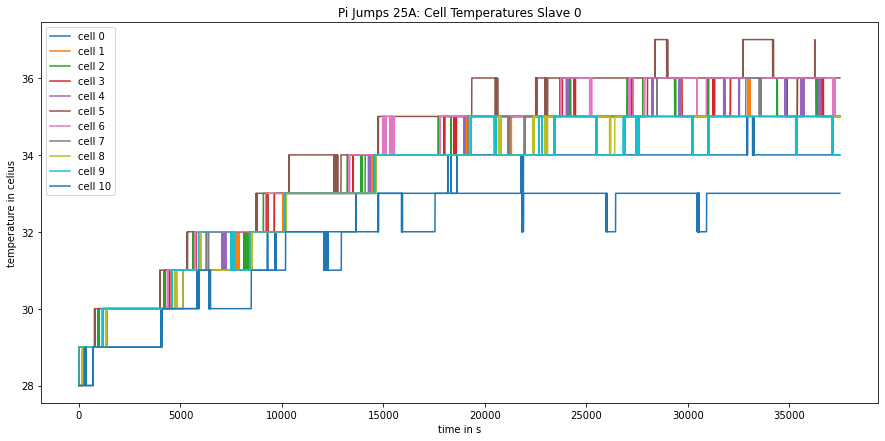

In [231]:
temp_slave_0 = np.loadtxt('../data/fobss_data/data/Ri Jumps 25A/cells/Slave_0_Cell_Temperatures.csv', delimiter=';')
temp_slave_0 = temp_slave_0[0:25000,:]

temp_slave_0 = temp_slave_0 - [temp_slave_0[0,0],0,0,0,0,0,0,0,0,0,0,0]

plt.subplots(figsize = (15,7))
plt.title('Ri Jumps 25A: Cell Temperatures Slave 0')
plt.plot(temp_slave_0[:,0], temp_slave_0[:,1], label="cell 0")
plt.plot(temp_slave_0[:,0], temp_slave_0[:,2], label="cell 1")
plt.plot(temp_slave_0[:,0], temp_slave_0[:,3], label="cell 2")
plt.plot(temp_slave_0[:,0], temp_slave_0[:,4], label="cell 3")
plt.plot(temp_slave_0[:,0], temp_slave_0[:,5], label="cell 4")
plt.plot(temp_slave_0[:,0], temp_slave_0[:,6], label="cell 5")
plt.plot(temp_slave_0[:,0], temp_slave_0[:,7], label="cell 6")
plt.plot(temp_slave_0[:,0], temp_slave_0[:,8], label="cell 7")
plt.plot(temp_slave_0[:,0], temp_slave_0[:,9], label="cell 8")
plt.plot(temp_slave_0[:,0], temp_slave_0[:,10], label="cell 9")
plt.plot(temp_slave_0[:,0], temp_slave_0[:,11], label="cell 10")
plt.legend()
plt.xlabel('time in s')
plt.ylabel('temperature in celius')
plt.savefig('../../Screenshots/ri_jumps_25A-full_profile-slave_O_cell_temps.png')

#### Min, Max of Slave Temperatures

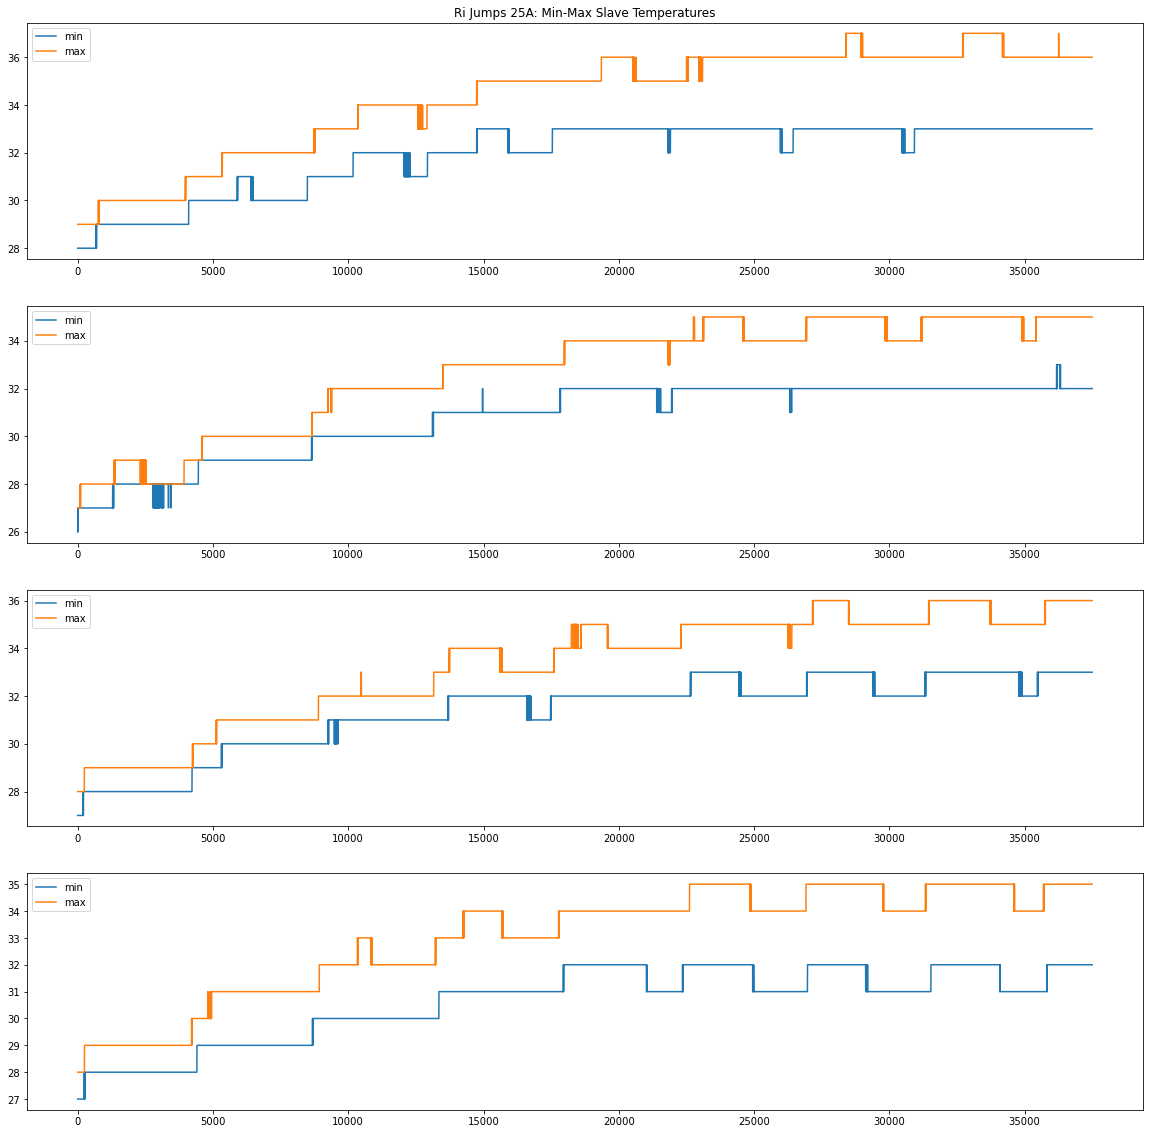

In [238]:
# load cell temperature data
temp_slave_0 = np.loadtxt('../data/fobss_data/data/Ri Jumps 25A/cells/Slave_0_Cell_Temperatures.csv', delimiter=';')
temp_slave_1 = np.loadtxt('../data/fobss_data/data/Ri Jumps 25A/cells/Slave_1_Cell_Temperatures.csv', delimiter=';')
temp_slave_2 = np.loadtxt('../data/fobss_data/data/Ri Jumps 25A/cells/Slave_2_Cell_Temperatures.csv', delimiter=';')
temp_slave_3 = np.loadtxt('../data/fobss_data/data/Ri Jumps 25A/cells/Slave_3_Cell_Temperatures.csv', delimiter=';')
# delete unnecessary data
temp_slave_0 = temp_slave_0[0:25000,:]
temp_slave_1 = temp_slave_1[0:25000,:]
temp_slave_2 = temp_slave_2[0:25000,:]
temp_slave_3 = temp_slave_3[0:25000,:]
# compute min and max temperatures for each slave
temp_slave_0 = np.column_stack((temp_slave_0[:,0], np.min(temp_slave_0[:, 1:temp_slave_0.shape[1]], axis=1), np.max(temp_slave_0[:, 1:temp_slave_0.shape[1]], axis=1)))
temp_slave_1 = np.column_stack((temp_slave_1[:,0], np.min(temp_slave_1[:, 1:temp_slave_1.shape[1]], axis=1), np.max(temp_slave_1[:, 1:temp_slave_1.shape[1]], axis=1)))
temp_slave_2 = np.column_stack((temp_slave_2[:,0], np.min(temp_slave_2[:, 1:temp_slave_2.shape[1]], axis=1), np.max(temp_slave_2[:, 1:temp_slave_2.shape[1]], axis=1)))
temp_slave_3 = np.column_stack((temp_slave_3[:,0], np.min(temp_slave_3[:, 1:temp_slave_3.shape[1]], axis=1), np.max(temp_slave_3[:, 1:temp_slave_3.shape[1]], axis=1)))
# normalize CAN time
temp_slave_0 = temp_slave_0 - [temp_slave_0[0,0],0,0] 
temp_slave_1 = temp_slave_1 - [temp_slave_1[0,0],0,0]
temp_slave_2 = temp_slave_2 - [temp_slave_2[0,0],0,0]
temp_slave_3 = temp_slave_3 - [temp_slave_3[0,0],0,0]
# plot graph
plt.subplots(figsize = (20,20))
plt.subplot(4,1,1)
plt.title('Ri Jumps 25A: Min-Max Slave Temperatures')
plt.plot(temp_slave_0[:,0], temp_slave_0[:,1], label="min")
plt.plot(temp_slave_0[:,0], temp_slave_0[:,2], label="max")
plt.legend()
plt.subplot(4,1,2)
plt.plot(temp_slave_1[:,0], temp_slave_1[:,1], label="min")
plt.plot(temp_slave_1[:,0], temp_slave_1[:,2], label="max")
plt.legend()
plt.subplot(4,1,3)
plt.plot(temp_slave_2[:,0], temp_slave_2[:,1], label="min")
plt.plot(temp_slave_2[:,0], temp_slave_2[:,2], label="max")
plt.legend()
plt.subplot(4,1,4)
plt.plot(temp_slave_3[:,0], temp_slave_3[:,1], label="min")
plt.plot(temp_slave_3[:,0], temp_slave_3[:,2], label="max")
plt.legend()
plt.savefig('../../Screenshots/ri_jumps_25A-full_profile-min_max_slave_temps.png')

#### Comparison of two profiles at Start and End (Slave 0)

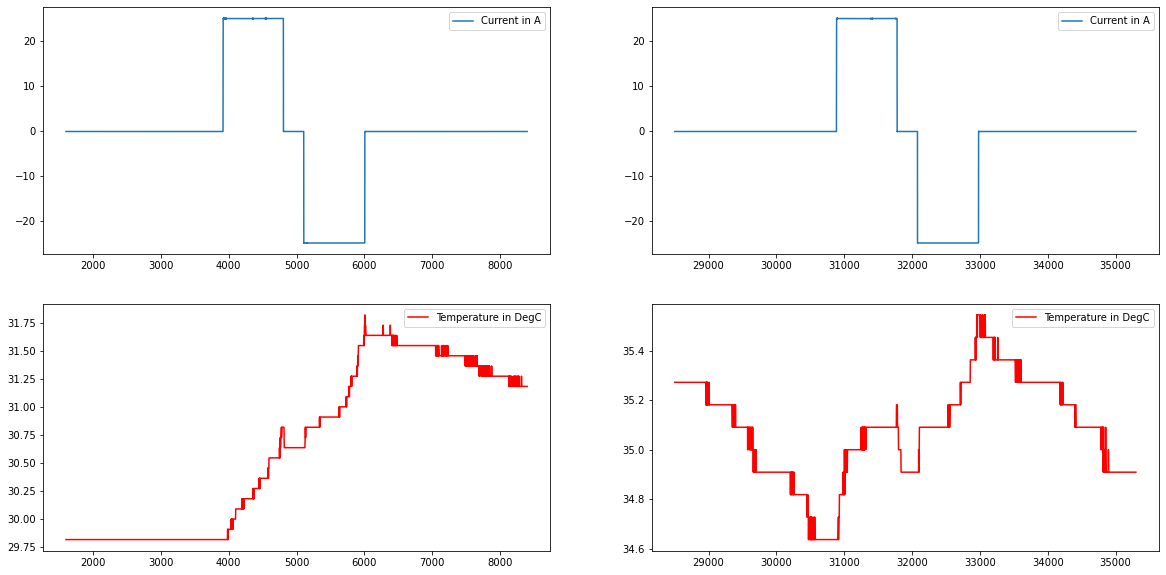

In [255]:
# load cell temperature data
temp_slave_0 = np.loadtxt('../data/fobss_data/data/Ri Jumps 25A/cells/Slave_0_Cell_Temperatures.csv', delimiter=';')
temp_slave_1 = np.loadtxt('../data/fobss_data/data/Ri Jumps 25A/cells/Slave_1_Cell_Temperatures.csv', delimiter=';')
temp_slave_2 = np.loadtxt('../data/fobss_data/data/Ri Jumps 25A/cells/Slave_2_Cell_Temperatures.csv', delimiter=';')
temp_slave_3 = np.loadtxt('../data/fobss_data/data/Ri Jumps 25A/cells/Slave_3_Cell_Temperatures.csv', delimiter=';')
# delete unnecessary data
temp_slave_0 = temp_slave_0[0:25000,:]
temp_slave_1 = temp_slave_1[0:25000,:]
temp_slave_2 = temp_slave_2[0:25000,:]
temp_slave_3 = temp_slave_3[0:25000,:]
# compute average temperatures for each slave
temp_slave_0 = np.column_stack((temp_slave_0[:,0], np.mean(temp_slave_0[:, 1:temp_slave_0.shape[1]], axis=1)))
temp_slave_1 = np.column_stack((temp_slave_1[:,0], np.mean(temp_slave_1[:, 1:temp_slave_1.shape[1]], axis=1)))
temp_slave_2 = np.column_stack((temp_slave_2[:,0], np.mean(temp_slave_2[:, 1:temp_slave_2.shape[1]], axis=1)))
temp_slave_3 = np.column_stack((temp_slave_3[:,0], np.mean(temp_slave_3[:, 1:temp_slave_3.shape[1]], axis=1)))
# normalize CAN time
temp_slave_0 = temp_slave_0 - [temp_slave_0[0,0],0] 
temp_slave_1 = temp_slave_1 - [temp_slave_1[0,0],0]
temp_slave_2 = temp_slave_2 - [temp_slave_2[0,0],0]
temp_slave_3 = temp_slave_3 - [temp_slave_3[0,0],0]

# delta is 6800
cur_profile_early = cur_inv[np.where(cur_inv[:,0] > 1600)]
cur_profile_early = cur_profile_early[np.where(cur_profile_early[:,0] < 8400)]

temp_profile_early = temp_slave_0[np.where(temp_slave_0[:,0] > 1600)]
temp_profile_early = temp_profile_early[np.where(temp_profile_early[:,0] < 8400)]


cur_profile_late = cur_inv[np.where(cur_inv[:,0] > 28500)]
cur_profile_late = cur_profile_late[np.where(cur_profile_late[:,0] < 35300)]

temp_profile_late = temp_slave_0[np.where(temp_slave_0[:,0] > 28500)]
temp_profile_late = temp_profile_late[np.where(temp_profile_late[:,0] < 35300)]

# plot graph
plt.subplots(figsize = (20,10))
plt.title('Ri Jumps 25A: Profile Comparison')
plt.subplot(2,2,1)
plt.plot(cur_profile_early[:,0], cur_profile_early[:,1], label="Current in A")
plt.legend()
plt.subplot(2,2,3)
plt.plot(temp_profile_early[:,0], temp_profile_early[:,1], label="Temperature in DegC", color='red')
plt.legend()
plt.subplot(2,2,2)
plt.plot(cur_profile_late[:,0], cur_profile_late[:,1], label="Current in A")
plt.legend()
plt.subplot(2,2,4)
plt.plot(temp_profile_late[:,0], temp_profile_late[:,1], label="Temperature in DegC", color='red')
plt.legend()
plt.savefig('../../Screenshots/ri_jumps_25A-sparse_profile-temps_comparison_start_end.png')

## Small Profiles
---

### Profile: -10A
---

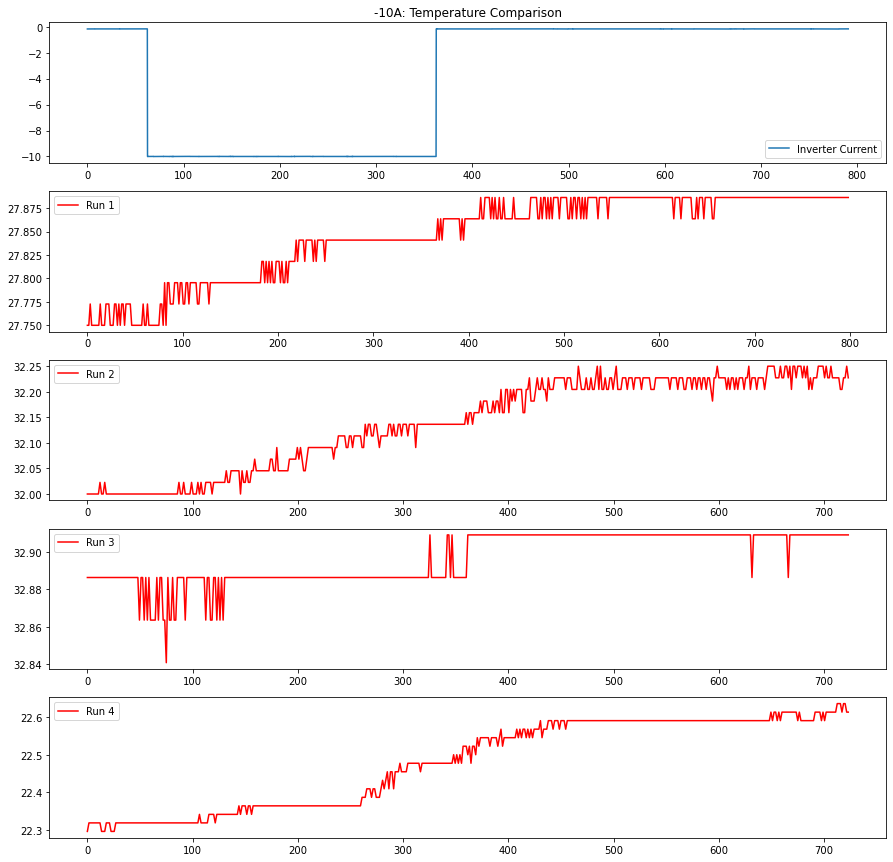

In [256]:
# load inverter data
cur_inv = np.loadtxt('../data/fobss_data/data/Profile -10A/inverter/Inverter_Current.csv', delimiter=';')
# normalize CAN time
cur_inv = cur_inv - [cur_inv[0,0],0]

temp_slave_0_run_0 = np.loadtxt('../data/fobss_data/data/Profile -10A/cells/Slave_0_Cell_Temperatures.csv', delimiter=';')
temp_slave_1_run_0 = np.loadtxt('../data/fobss_data/data/Profile -10A/cells/Slave_1_Cell_Temperatures.csv', delimiter=';')
temp_slave_2_run_0 = np.loadtxt('../data/fobss_data/data/Profile -10A/cells/Slave_2_Cell_Temperatures.csv', delimiter=';')
temp_slave_3_run_0 = np.loadtxt('../data/fobss_data/data/Profile -10A/cells/Slave_3_Cell_Temperatures.csv', delimiter=';')

temp_slave_0_run_1 = np.loadtxt('../data/fobss_data/data/Profile -10A Run 070618/cells/Slave_0_Cell_Temperatures.csv', delimiter=';')
temp_slave_1_run_1 = np.loadtxt('../data/fobss_data/data/Profile -10A Run 070618/cells/Slave_1_Cell_Temperatures.csv', delimiter=';')
temp_slave_2_run_1 = np.loadtxt('../data/fobss_data/data/Profile -10A Run 070618/cells/Slave_2_Cell_Temperatures.csv', delimiter=';')
temp_slave_3_run_1 = np.loadtxt('../data/fobss_data/data/Profile -10A Run 070618/cells/Slave_3_Cell_Temperatures.csv', delimiter=';')

temp_slave_0_run_2 = np.loadtxt('../data/fobss_data/data/Profile -10A Run 070618_2/cells/Slave_0_Cell_Temperatures.csv', delimiter=';')
temp_slave_1_run_2 = np.loadtxt('../data/fobss_data/data/Profile -10A Run 070618_2/cells/Slave_1_Cell_Temperatures.csv', delimiter=';')
temp_slave_2_run_2 = np.loadtxt('../data/fobss_data/data/Profile -10A Run 070618_2/cells/Slave_2_Cell_Temperatures.csv', delimiter=';')
temp_slave_3_run_2 = np.loadtxt('../data/fobss_data/data/Profile -10A Run 070618_2/cells/Slave_3_Cell_Temperatures.csv', delimiter=';')

temp_slave_0_run_3 = np.loadtxt('../data/fobss_data/data/Profile -10A Run 080618_2/cells/Slave_0_Cell_Temperatures.csv', delimiter=';')
temp_slave_1_run_3 = np.loadtxt('../data/fobss_data/data/Profile -10A Run 080618_2/cells/Slave_1_Cell_Temperatures.csv', delimiter=';')
temp_slave_2_run_3 = np.loadtxt('../data/fobss_data/data/Profile -10A Run 080618_2/cells/Slave_2_Cell_Temperatures.csv', delimiter=';')
temp_slave_3_run_3 = np.loadtxt('../data/fobss_data/data/Profile -10A Run 080618_2/cells/Slave_3_Cell_Temperatures.csv', delimiter=';')

temp_slave_0_run_0 = np.column_stack((temp_slave_0_run_0[:,0], np.mean(temp_slave_0_run_0[:, 1:temp_slave_0_run_0.shape[1]], axis=1)))
temp_slave_1_run_0 = np.column_stack((temp_slave_1_run_0[:,0], np.mean(temp_slave_1_run_0[:, 1:temp_slave_1_run_0.shape[1]], axis=1)))
temp_slave_2_run_0 = np.column_stack((temp_slave_2_run_0[:,0], np.mean(temp_slave_2_run_0[:, 1:temp_slave_2_run_0.shape[1]], axis=1)))
temp_slave_3_run_0 = np.column_stack((temp_slave_3_run_0[:,0], np.mean(temp_slave_3_run_0[:, 1:temp_slave_3_run_0.shape[1]], axis=1)))

temp_slave_0_run_1 = np.column_stack((temp_slave_0_run_1[:,0], np.mean(temp_slave_0_run_1[:, 1:temp_slave_0_run_1.shape[1]], axis=1)))
temp_slave_1_run_1 = np.column_stack((temp_slave_1_run_1[:,0], np.mean(temp_slave_1_run_1[:, 1:temp_slave_1_run_1.shape[1]], axis=1)))
temp_slave_2_run_1 = np.column_stack((temp_slave_2_run_1[:,0], np.mean(temp_slave_2_run_1[:, 1:temp_slave_2_run_1.shape[1]], axis=1)))
temp_slave_3_run_1 = np.column_stack((temp_slave_3_run_1[:,0], np.mean(temp_slave_3_run_1[:, 1:temp_slave_3_run_1.shape[1]], axis=1)))

temp_slave_0_run_2 = np.column_stack((temp_slave_0_run_2[:,0], np.mean(temp_slave_0_run_2[:, 1:temp_slave_0_run_2.shape[1]], axis=1)))
temp_slave_1_run_2 = np.column_stack((temp_slave_1_run_2[:,0], np.mean(temp_slave_1_run_2[:, 1:temp_slave_1_run_2.shape[1]], axis=1)))
temp_slave_2_run_2 = np.column_stack((temp_slave_2_run_2[:,0], np.mean(temp_slave_2_run_2[:, 1:temp_slave_2_run_2.shape[1]], axis=1)))
temp_slave_3_run_2 = np.column_stack((temp_slave_3_run_2[:,0], np.mean(temp_slave_3_run_2[:, 1:temp_slave_3_run_2.shape[1]], axis=1)))

temp_slave_0_run_3 = np.column_stack((temp_slave_0_run_3[:,0], np.mean(temp_slave_0_run_3[:, 1:temp_slave_0_run_3.shape[1]], axis=1)))
temp_slave_1_run_3 = np.column_stack((temp_slave_1_run_3[:,0], np.mean(temp_slave_1_run_3[:, 1:temp_slave_1_run_3.shape[1]], axis=1)))
temp_slave_2_run_3 = np.column_stack((temp_slave_2_run_3[:,0], np.mean(temp_slave_2_run_3[:, 1:temp_slave_2_run_3.shape[1]], axis=1)))
temp_slave_3_run_3 = np.column_stack((temp_slave_3_run_3[:,0], np.mean(temp_slave_3_run_3[:, 1:temp_slave_3_run_3.shape[1]], axis=1)))

temp_slave_run_0 = np.column_stack((temp_slave_0_run_0[:,0], np.mean([temp_slave_0_run_0[:,1], temp_slave_1_run_0[:,1], temp_slave_2_run_0[:,1], temp_slave_3_run_0[:,1]], axis=0)))
temp_slave_run_1 = np.column_stack((temp_slave_0_run_1[:,0], np.mean([temp_slave_0_run_1[:,1], temp_slave_1_run_1[:,1], temp_slave_2_run_1[:,1], temp_slave_3_run_1[:,1]], axis=0)))
temp_slave_run_2 = np.column_stack((temp_slave_0_run_2[:,0], np.mean([temp_slave_0_run_2[:,1], temp_slave_1_run_2[:,1], temp_slave_2_run_2[:,1], temp_slave_3_run_2[:,1]], axis=0)))
temp_slave_run_3 = np.column_stack((temp_slave_0_run_3[:,0], np.mean([temp_slave_0_run_3[:,1], temp_slave_1_run_3[:,1], temp_slave_2_run_3[:,1], temp_slave_3_run_3[:,1]], axis=0)))

temp_slave_run_0 = temp_slave_run_0 - [temp_slave_run_0[0,0], 0]
temp_slave_run_1 = temp_slave_run_1 - [temp_slave_run_1[0,0], 0]
temp_slave_run_2 = temp_slave_run_2 - [temp_slave_run_2[0,0], 0]
temp_slave_run_3 = temp_slave_run_3 - [temp_slave_run_3[0,0], 0]

# plot graph
plt.subplots(figsize = (15,15))
plt.subplot(5,1,1)
plt.title('-10A: Temperature Comparison')
plt.plot(cur_inv[:,0], cur_inv[:,1], label="Inverter Current")
plt.legend()
plt.subplot(5,1,2)
plt.plot(temp_slave_run_0[:,0], temp_slave_run_0[:,1], label="Run 1", color='red')
plt.legend()
plt.subplot(5,1,3)
plt.plot(temp_slave_run_1[:,0], temp_slave_run_1[:,1], label="Run 2", color='red')
plt.legend()
plt.subplot(5,1,4)
plt.plot(temp_slave_run_2[:,0], temp_slave_run_2[:,1], label="Run 3", color='red')
plt.legend()
plt.subplot(5,1,5)
plt.plot(temp_slave_run_3[:,0], temp_slave_run_3[:,1], label="Run 4", color='red')
plt.legend()
plt.savefig('../../Screenshots/10A-sparse_profile-temps_comparison_multiple_runs.png')

#### Different Current Values
---


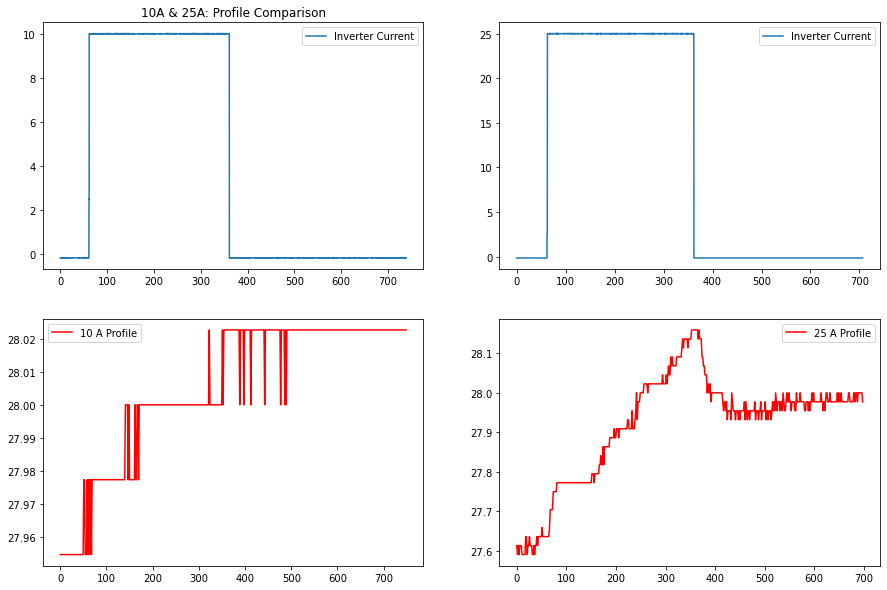

In [241]:
# load inverter data
cur_inv_10 = np.loadtxt('../data/fobss_data/data/Profile 10A/inverter/Inverter_Current.csv', delimiter=';')
cur_inv_25 = np.loadtxt('../data/fobss_data/data/Profile 25A Run 070618/inverter/Inverter_Current.csv', delimiter=';')
# normalize CAN time
cur_inv_10 = cur_inv_10 - [cur_inv_10[0,0],0]
cur_inv_25 = cur_inv_25 - [cur_inv_25[0,0],0]

temp_slave_0_run_0 = np.loadtxt('../data/fobss_data/data/Profile 10A/cells/Slave_0_Cell_Temperatures.csv', delimiter=';')
temp_slave_1_run_0 = np.loadtxt('../data/fobss_data/data/Profile 10A/cells/Slave_1_Cell_Temperatures.csv', delimiter=';')
temp_slave_2_run_0 = np.loadtxt('../data/fobss_data/data/Profile 10A/cells/Slave_2_Cell_Temperatures.csv', delimiter=';')
temp_slave_3_run_0 = np.loadtxt('../data/fobss_data/data/Profile 10A/cells/Slave_3_Cell_Temperatures.csv', delimiter=';')

temp_slave_0_run_1 = np.loadtxt('../data/fobss_data/data/Profile 25A Run 070618/cells/Slave_0_Cell_Temperatures.csv', delimiter=';')
temp_slave_1_run_1 = np.loadtxt('../data/fobss_data/data/Profile 25A Run 070618/cells/Slave_1_Cell_Temperatures.csv', delimiter=';')
temp_slave_2_run_1 = np.loadtxt('../data/fobss_data/data/Profile 25A Run 070618/cells/Slave_2_Cell_Temperatures.csv', delimiter=';')
temp_slave_3_run_1 = np.loadtxt('../data/fobss_data/data/Profile 25A Run 070618/cells/Slave_3_Cell_Temperatures.csv', delimiter=';')

temp_slave_0_run_0 = np.column_stack((temp_slave_0_run_0[:,0], np.mean(temp_slave_0_run_0[:, 1:temp_slave_0_run_0.shape[1]], axis=1)))
temp_slave_1_run_0 = np.column_stack((temp_slave_1_run_0[:,0], np.mean(temp_slave_1_run_0[:, 1:temp_slave_1_run_0.shape[1]], axis=1)))
temp_slave_2_run_0 = np.column_stack((temp_slave_2_run_0[:,0], np.mean(temp_slave_2_run_0[:, 1:temp_slave_2_run_0.shape[1]], axis=1)))
temp_slave_3_run_0 = np.column_stack((temp_slave_3_run_0[:,0], np.mean(temp_slave_3_run_0[:, 1:temp_slave_3_run_0.shape[1]], axis=1)))

temp_slave_0_run_1 = np.column_stack((temp_slave_0_run_1[:,0], np.mean(temp_slave_0_run_1[:, 1:temp_slave_0_run_1.shape[1]], axis=1)))
temp_slave_1_run_1 = np.column_stack((temp_slave_1_run_1[:,0], np.mean(temp_slave_1_run_1[:, 1:temp_slave_1_run_1.shape[1]], axis=1)))
temp_slave_2_run_1 = np.column_stack((temp_slave_2_run_1[:,0], np.mean(temp_slave_2_run_1[:, 1:temp_slave_2_run_1.shape[1]], axis=1)))
temp_slave_3_run_1 = np.column_stack((temp_slave_3_run_1[:,0], np.mean(temp_slave_3_run_1[:, 1:temp_slave_3_run_1.shape[1]], axis=1)))

temp_slave_run_0 = np.column_stack((temp_slave_0_run_0[:,0], np.mean([temp_slave_0_run_0[:,1], temp_slave_1_run_0[:,1], temp_slave_2_run_0[:,1], temp_slave_3_run_0[:,1]], axis=0)))
temp_slave_run_1 = np.column_stack((temp_slave_0_run_1[:,0], np.mean([temp_slave_0_run_1[:,1], temp_slave_1_run_1[:,1], temp_slave_2_run_1[:,1], temp_slave_3_run_1[:,1]], axis=0)))

temp_slave_run_0 = temp_slave_run_0 - [temp_slave_run_0[0,0], 0]
temp_slave_run_1 = temp_slave_run_1 - [temp_slave_run_1[0,0], 0]

# plot graph
plt.subplots(figsize = (15,10))
plt.subplot(2,2,1)
plt.title('10A & 25A: Profile Comparison')
plt.plot(cur_inv_10[:,0], cur_inv_10[:,1], label="Inverter Current")
plt.legend()
plt.subplot(2,2,3)
plt.plot(temp_slave_run_0[:,0], temp_slave_run_0[:,1], label="10 A Profile", color='red')
plt.legend()
plt.subplot(2,2,2)
plt.plot(cur_inv_25[:,0], cur_inv_25[:,1], label="Inverter Current")
plt.legend()
plt.subplot(2,2,4)
plt.plot(temp_slave_run_1[:,0], temp_slave_run_1[:,1], label="25 A Profile", color='red')
plt.legend()
plt.savefig('../../Screenshots/10A_25A-sparse_profile-temps_comparison_multiple_runs.png')

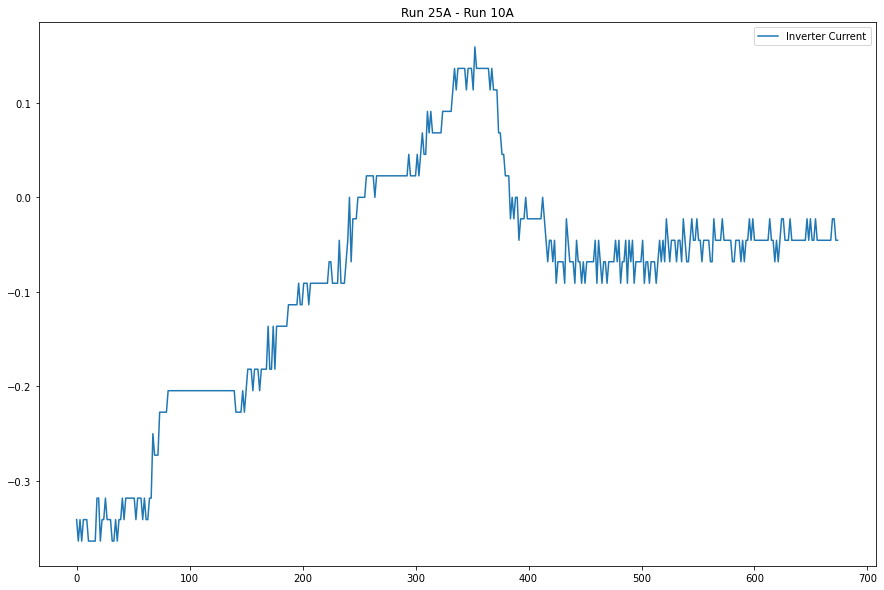

In [247]:
temp_delta = temp_slave_run_1[0:450,1] - temp_slave_run_0[0:450,1]
# plot graph
plt.subplots(figsize = (15,10))
plt.title('Run 25A - Run 10A')
plt.plot(temp_slave_run_1[0:450,0], temp_delta, label="Inverter Current")
plt.legend()
plt.savefig('../../Screenshots/10A_25A-sparse_profile-temps_comparison_delta.png')